In [1]:
import xml.etree.ElementTree as et

xtree = et.parse('C:/Users/user/Desktop/Engineering_Programing_2/P184640_D08_(0,2)_GORILLA5_DCM_LMZC.xml')
xroot = xtree.getroot()

element = xroot.findall('TestSiteInfo')

data = element[0].attrib

print(data)

{'Batch': 'P184640', 'DieColumn': '2', 'DieRow': '0', 'Maskset': 'GORILLA5', 'TestSite': 'DCM_LMZC', 'Wafer': 'D08'}


- ### TestSiteInfo가 어떤 형태의 자료형인지 궁금해서 attrib하고 print를 했더니 dictionary형 자료형이었다.
    - ##### Dictionary 자료형 
    - ##### {key1 : value 1 , key2 : value 2 , key3 : value 3 , ...}
    - ##### {}안에 key값과 value값이 짝을 지어 있는 자료형
        - ##### 그래서 우리가 처음에 알았던 것은 애초부터 불완전했던 것

In [2]:
Batch = data['Batch']
DieColumn = data['DieColumn']
DieRow = data['DieRow']
Maskset = data['Maskset']
TestSite = data['TestSite']
Wafer = data['Wafer']

print('Batch : ' + Batch)
print()
print('DieColumn : ' + DieColumn)
print()
print('DieRow : ' + DieRow)
print()
print('Maskset : ' + Maskset)
print()
print('TestSite : ' + TestSite)
print()
print('Wafer : ' + Wafer)

Batch : P184640

DieColumn : 2

DieRow : 0

Maskset : GORILLA5

TestSite : DCM_LMZC

Wafer : D08


### IV 자료 뽑아오기

In [3]:
root_1_ = xroot.find('ElectroOpticalMeasurements')
root_2_ = root_1_.find('ModulatorSite')
root_3_ = root_2_.find('Modulator')
root_4_ = root_3_.find('PortCombo')

#위에서 한 것 처럼 바로 찾는 것이 아니라 최상위 노드부터 차례차례 내려가야 한다.

IVdata = root_4_.findall('IVMeasurement')

voltage = [v.findtext('Voltage') for v in IVdata]
current = [i.findtext('Current') for i in IVdata]

#데이터 중간중간의 컴마(,) 때문에 실수로 받아들이지 못하고 문자로 받아들인다.

print(voltage)
print()
print(current)

['-2.0,-1.75,-1.5,-1.25,-1.0,-0.75,-0.5,-0.25,0.0,0.25,0.5,0.75,1.0']

['4.835394e-10,3.260189e-10,2.217012e-10,1.387472e-10,7.961963e-11,3.743334e-11,1.519271e-11,-5.337101e-12,-2.123519e-11,-5.708346e-11,-3.094061e-09,-4.282794e-06,-0.005282801']


#### 어찌어찌 자료를 뽑아오긴 했지만 실수가 아닌 문자 형태의 자료이다.

#### 이제 문자를 실수 형태로 변환해야 한다.

In [4]:
vtext = voltage[0].split(',')
itext = current[0].split(',')

#컴마(,) 기준으로 문자들을 전부 쪼개는 과정이다.

print(vtext)
print()
print(itext)

['-2.0', '-1.75', '-1.5', '-1.25', '-1.0', '-0.75', '-0.5', '-0.25', '0.0', '0.25', '0.5', '0.75', '1.0']

['4.835394e-10', '3.260189e-10', '2.217012e-10', '1.387472e-10', '7.961963e-11', '3.743334e-11', '1.519271e-11', '-5.337101e-12', '-2.123519e-11', '-5.708346e-11', '-3.094061e-09', '-4.282794e-06', '-0.005282801']


In [5]:
vfloat = []
ifloat = []

#아직은 문자 형태이므로 이제 숫자로 바꿔줘야 한다.

#float(text)는 text를 '실수' 형태로 바꿔준 것이다.

#int(text)는 '정수'이다. 전압, 전류 둘 다 정수가 아닌 실수이므로 float(text)를 쓴다.

#물론 모든 text에 쓰는 것에 무리가 있다. text가 '12345'와 같은 형태여야 한다.

for i in range(0,len(vtext)):    
    
    vfloat.append(float(vtext[i]))
    
for i in range(0, len(itext)):
    
    ifloat.append(float(itext[i]))
    
#for문은 특정한 범위 안에서 반복을 하는 형태이다.

#i 값을 0부터 len(list) 이전까지 차례차례 대입해서 밑의 명령어를 반복하겠다는 뜻이다.

#len(list)는 리스트 자료형의 길이로, vtext와 itext는 13이다.

#range안에 (0, len(list)+1)을 안하는 이유는, 어짜피 0부터 세니 len(list)를 세지 않아도 13개 전부 다 센다.

#append(element)는 리스트 자료형에 요소를 차곡차곡 차례대로 쌓겠다는 의미다.

#i=0부터 쌓기 시작하므로 우리가 원하는대로 작은 따옴표만 없앤 형태로 리스트를 만들 수 있다.
    
    
print(vfloat)
print()
print(ifloat)

[-2.0, -1.75, -1.5, -1.25, -1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0]

[4.835394e-10, 3.260189e-10, 2.217012e-10, 1.387472e-10, 7.961963e-11, 3.743334e-11, 1.519271e-11, -5.337101e-12, -2.123519e-11, -5.708346e-11, -3.094061e-09, -4.282794e-06, -0.005282801]


### 지금까지 IV 데이터를 숫자 형태로 뽑아서 리스트 형태로 정리했다.

### 이제 리스트로 그래프를 뽑는 방법을 찾아야 한다.

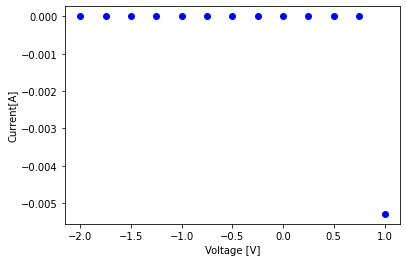

In [14]:
import matplotlib.pyplot as plt

#matplotlib은 그래프 그려주는 모듈이다.

plt.plot(vfloat,ifloat, 'bo')

#x축에 전압, y축에 전류를 파란색(b) 점(o)으로 찍은 것이다.

plt.xlabel('Voltage [V]')
plt.ylabel('Current[A]')

#x축과 y축에 이름을 붙여준 것이다.

plt.show()

### 전류값이 다 거기서 거기니 log를 취하는 것도 나쁘지 않는 것 같다.

<ipython-input-32-f599efc0b26a>:5: RuntimeWarning: invalid value encountered in log
  logscale = (lambda c : np.log(c))(ifloat[i])


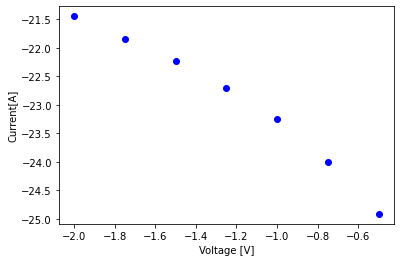

In [32]:
import numpy as np

logi = []
for i in range(0, len(itext)):
    logscale = (lambda c : np.log(c))(ifloat[i])
    logi.append(logscale)

plt.plot(vfloat, logi, 'bo')
    
plt.xlabel('Voltage [V]')
plt.ylabel('Current[A]')

plt.show()

#근데 우리 전류 전압 데이터가 왤케 없는거 같냐

### 음수는 로그 안되는거 생각을 안했네;;;